# Kaggle Titanic project - Classification problem
## Prediction of who will survive
Libraries being used

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
%matplotlib inline
from matplotlib import rcParams

datasets provided

In [2]:
# linux machine path
# test =pd.read_csv('/home/mehroz/Desktop/ml/code1/input/test.csv', encoding='utf8', engine='python')
# train = pd.read_csv('/home/mehroz/Desktop/ml/code1/input/train.csv', encoding='utf8', engine='python')

#windows path
test =pd.read_csv('C:/Users/sheik/Desktop/ML/kaggle/Machine-learning--kaggle-titanic-progect-assignment-/input/test.csv', encoding='utf8', engine='python')
train = pd.read_csv('C:/Users/sheik/Desktop/ML/kaggle/Machine-learning--kaggle-titanic-progect-assignment-/input/train.csv', encoding='utf8', engine='python')

## properties of data


In [3]:
data = train.append(test,sort=False)
print ("data rows: %d \ndata attributes: %d" % (data.shape[0],data.shape[1]))


data rows: 1309 
data attributes: 12


## properties of training data
### attributes of training data

In [4]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

### no of columns of training data

In [5]:
cols = train.columns.size
cols

12

### no of rows

In [6]:
rows = train['PassengerId'].size
rows

891

### Alternatively

In [7]:
train.shape

(891, 12)

### train data is 66% 

### Attribute types

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### people who survived attribute wise comparison and graphs

In [9]:
survivors = train.Survived.sum()
survivors

342

### Deaths

In [10]:
rows - survivors

549

### Comparison

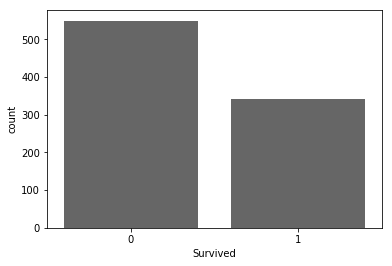

In [11]:
sb.countplot(x='Survived',data= train, color='#666666')

### example row value

In [12]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Gender ratio

c:\python27\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


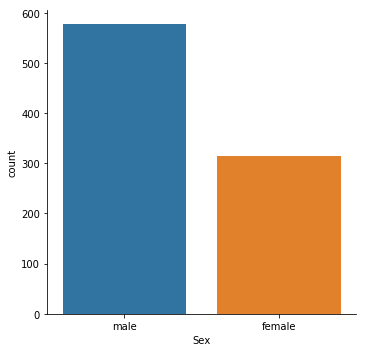

In [13]:
sb.factorplot(x='Sex', kind='count', data=train);

### Male vs Female survival rate

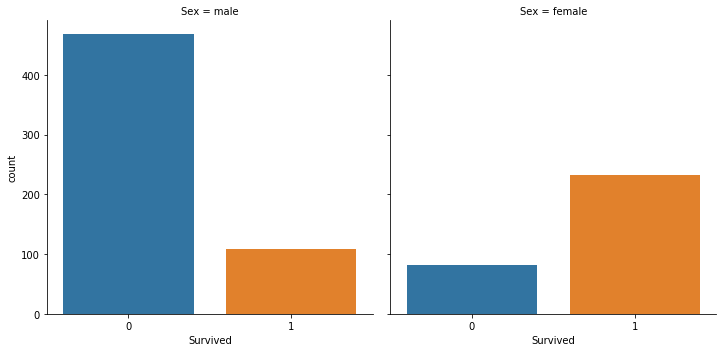

In [14]:
sb.factorplot(x='Survived', col='Sex', kind='count', data=train);

### Passangers in age 


Text(0,0.5,'count')

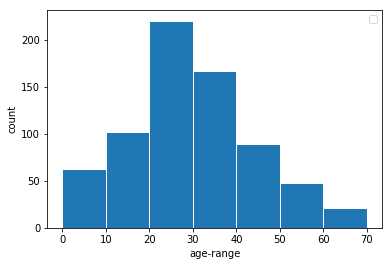

In [15]:
#ageRange = pd.cut(train['Age'],bins=[10,20,30,40,50,60,70,80])
ageBins=[x*10 for x in range(0,int(train.Age.max()/10))]
plt.hist(train.Age, ageBins, edgecolor="#ffffff")
plt.legend()
plt.xlabel("age-range")
plt.ylabel("count")

In [16]:
train['ageGroups']=pd.cut(train.Age,ageBins)
ageGroupsAndCounts = train.astype(str).groupby(['ageGroups']).PassengerId.agg(['count'])
ageGroupsAndCounts.T

ageGroups,"(0.0, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 70.0]",nan
count,64,115,230,155,86,42,17,182


### Gender saperated age groups

In [17]:
ageAndSexCounts=train.astype(str).groupby(['ageGroups','Sex']).PassengerId.agg(['count'])
# for i in range(0,16):
#     a = ageAndSexCounts.ageGroups.iloc[i].split(',')
#     ageAndSexCounts.ageGroups.iloc[i] =( (a[0][1:] + " to " + a[1][1:5]) if (i<14) else 'null')
ageAndSexCounts.T


ageGroups (0.0, 10.0]      (10.0, 20.0]      (20.0, 30.0]      (30.0, 40.0]  \
Sex            female male       female male       female male       female   
count              31   33           46   69           81  149           55   

ageGroups      (40.0, 50.0]      (50.0, 60.0]      (60.0, 70.0]         nan  \
Sex       male       female male       female male       female male female   
count      100           31   55           14   28            3   14     53   

ageGroups       
Sex       male  
count      129

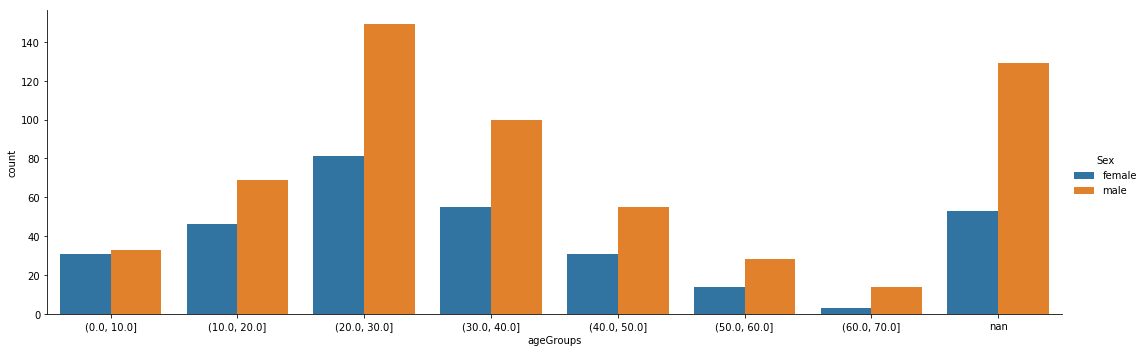

In [18]:

sb.factorplot(x='ageGroups', y='count', hue='Sex', data=ageAndSexCounts.reset_index(), kind='bar',aspect=3)

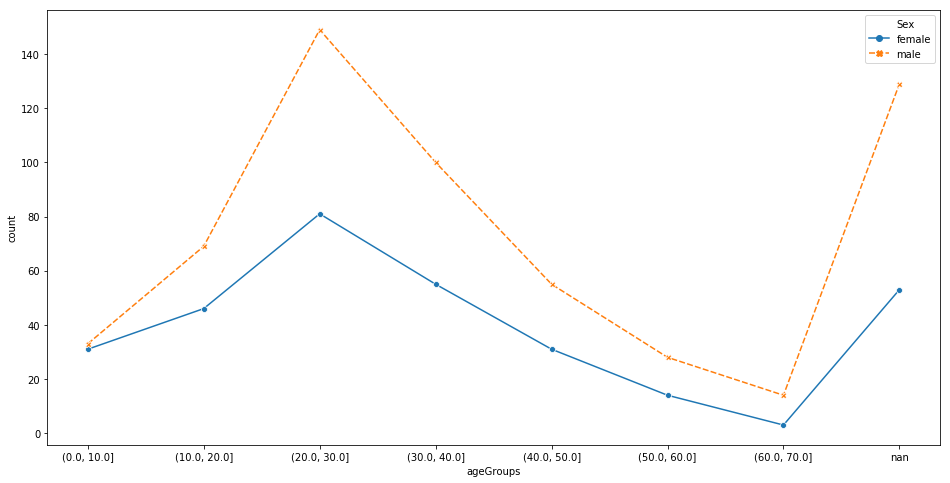

In [19]:
# figure size in inches
rcParams['figure.figsize'] = 16.0,8.0
sb.lineplot(x="ageGroups", y="count", hue="Sex", style="Sex", markers=True, data=ageAndSexCounts.reset_index())

### survival rates

In [20]:
train['ageGroups']=pd.cut(train.Age,ageBins)
survivors = train[train['Survived']==1].astype(str).groupby(['ageGroups','Sex']).Survived.agg(['count'])
survivors.T

ageGroups (0.0, 10.0]      (10.0, 20.0]      (20.0, 30.0]      (30.0, 40.0]  \
Sex            female male       female male       female male       female   
count              19   19           34   10           61   23           46   

ageGroups      (40.0, 50.0]      (50.0, 60.0]      (60.0, 70.0]         nan  \
Sex       male       female male       female male       female male female   
count       23           21   12           13    4            3    1     36   

ageGroups       
Sex       male  
count       17

### Below are people who survived

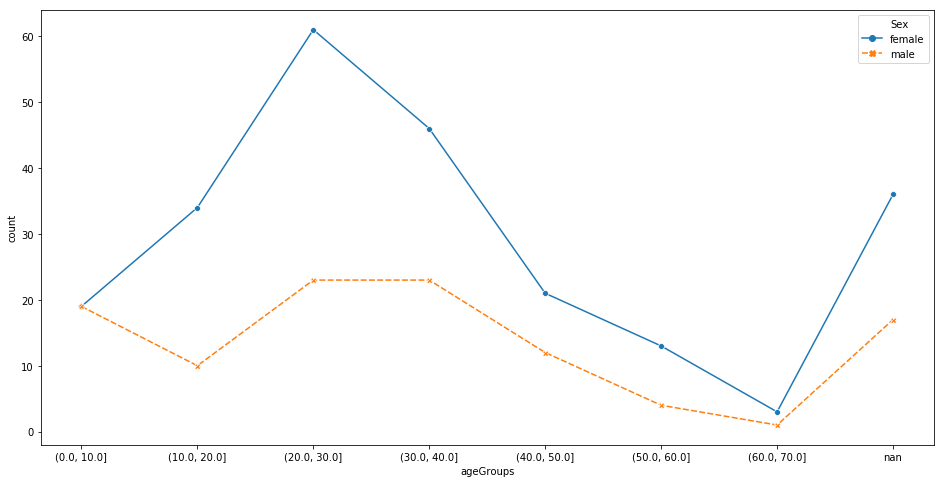

In [21]:
rcParams['figure.figsize'] = 16.0,8.0
# sb.lineplot(x="ageGroups", y="count", hue="Sex", style="Sex", markers=True, data=survivors.reset_index())
sb.lineplot(x="ageGroups", y="count", hue="Sex", style="Sex", markers=True, data=survivors.reset_index())


### Below are people who died

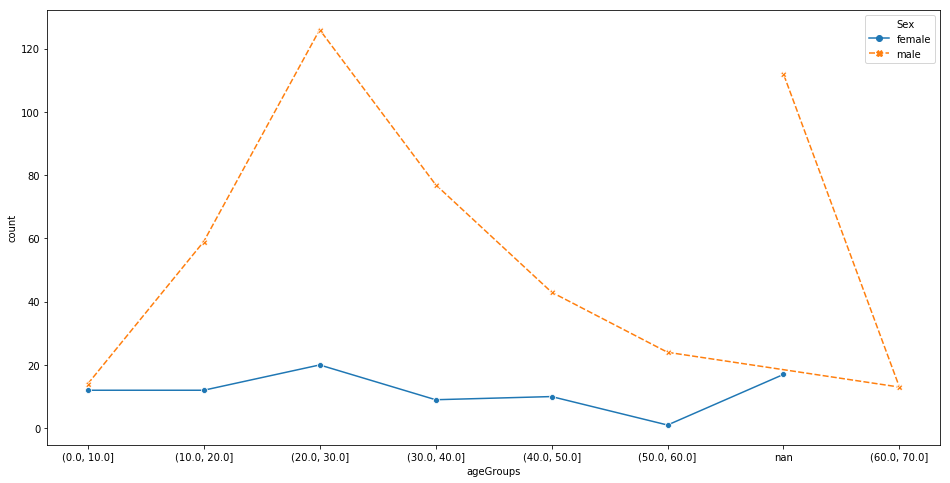

In [22]:
survivors = train[train['Survived']==0].astype(str).groupby(['ageGroups','Sex']).Survived.agg(['count'])
sb.lineplot(x="ageGroups", y="count", hue="Sex", style="Sex", markers=True, data=survivors.reset_index())


In [23]:
train.astype(str).groupby('Pclass').PassengerId.agg(['count']).T

Pclass,1,2,3
count,216,184,491


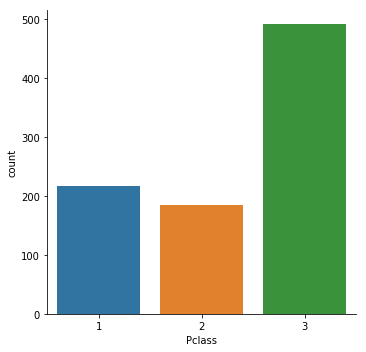

In [24]:
sb.factorplot(x='Pclass', kind='count', data=train);

### survivors to deaths

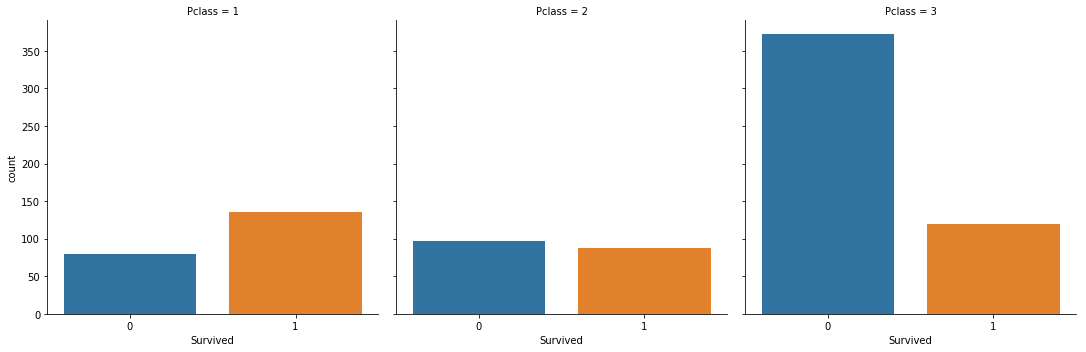

In [25]:
sb.factorplot(x='Survived', kind='count',col='Pclass', data=train);

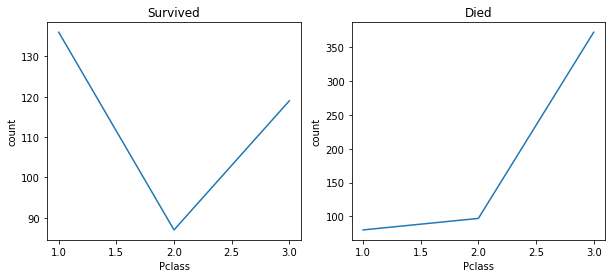

In [31]:
rcParams['figure.figsize'] = 10.0,4.0
fig, ax =plt.subplots(1,2)
sb.lineplot(x="Pclass", y="count", data=train[train.Survived==1].groupby('Pclass').PassengerId.agg(['count']).reset_index(), ax=ax[0]).set_title('Survived')
sb.lineplot(x="Pclass", y="count", data=train[train.Survived==0].groupby('Pclass').PassengerId.agg(['count']).reset_index(), ax=ax[1]).set_title('Died')
fig.show()

### SibSP relation

### survival rates

In [106]:
d = train.astype(str).groupby(['SibSp','Survived']).PassengerId.agg(['count'])
d.T

SibSp       0        1        2       3      4     5  8
Survived    0    1   0    1   0   1   0  1   0  1  0  0
count     398  210  97  112  15  13  12  4  15  3  5  7

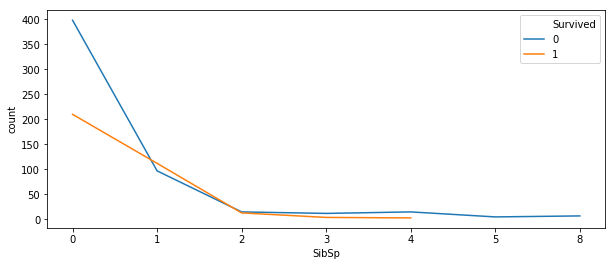

In [107]:
sb.lineplot(x="SibSp", y="count",hue="Survived", markers=True, data=d.reset_index())

### gender vise

In [73]:
d = train.astype(str).groupby(['SibSp','Survived','Sex']).PassengerId.agg(['count'])
d.T


SibSp         0                       1                       2       ...  \
Survived      0           1           0           1           0       ...   
Sex      female male female male female male female male female male  ...   
count        37  361    137   73     26   71     80   32      3   12  ...   

SibSp       3             4                       5           8       
Survived    0      1      0           1           0           0       
Sex      male female female male female male female male female male  
count       5      4      4   11      2    1      1    4      3    4  

[1 rows x 23 columns]

In [83]:
# sb.lineplot(x="SibSp", y="count",hue="Sex", style="Sex", markers=True, data=d.reset_index()).set_title('Died')
d=d.reset_index()

Text(0.5,1,'Died')

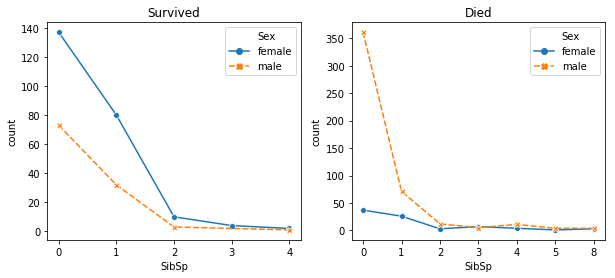

In [100]:
fig, ax = plt.subplots(1,2)
sb.lineplot(x="SibSp", y="count",hue="Sex", style="Sex", markers=True, data=d[d.Survived.astype('int64')==1],ax=ax[0]).set_title('Survived')
sb.lineplot(x="SibSp", y="count",hue="Sex", style="Sex", markers=True, data=d[d.Survived.astype('int64')==0],ax=ax[1]).set_title('Died')

### Parch relation on survival

In [108]:
d = train.astype(str).groupby(['Parch','Survived']).PassengerId.agg(['count'])
d.T

Parch       0        1       2      3     4  5     6
Survived    0    1   0   1   0   1  0  1  0  0  1  0
count     445  233  53  65  40  40  2  3  4  4  1  1

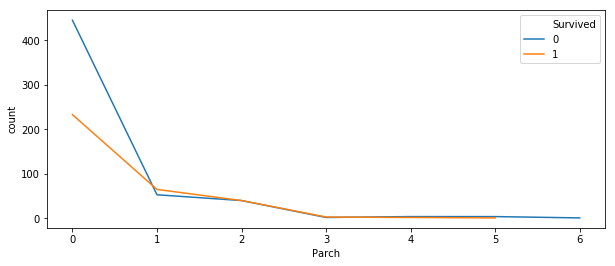

In [110]:
sb.lineplot(x="Parch", y="count",hue="Survived", markers=True, data=d.reset_index())

### Parch survival rates gender vise

In [102]:
d = train.astype(str).groupby(['Parch','Survived','Sex']).PassengerId.agg(['count'])
d.T


Parch         0                       1                       2       ...  \
Survived      0           1           0           1           0       ...   
Sex      female male female male female male female male female male  ...   
count        41  404    153   80     14   39     46   19     19   21  ...   

Parch              3                  4           5                  6  
Survived    1      0           1      0           0           1      0  
Sex      male female male female female male female male female female  
count      10      1    1      3      2    2      3    1      1      1  

[1 rows x 21 columns]

In [103]:
d=d.reset_index()

Text(0.5,1,'Died')

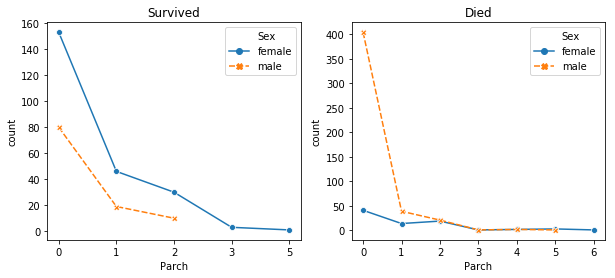

In [105]:
fig, ax = plt.subplots(1,2)
sb.lineplot(x="Parch", y="count",hue="Sex", style="Sex", markers=True, data=d[d.Survived.astype('int64')==1],ax=ax[0]).set_title('Survived')
sb.lineplot(x="Parch", y="count",hue="Sex", style="Sex", markers=True, data=d[d.Survived.astype('int64')==0],ax=ax[1]).set_title('Died')

### Cabin Survival rates

In [176]:
d= train.copy()
d.Cabin=d.Cabin.astype(str)!='nan'
d[d.Cabin==True].PassengerId.count()

204

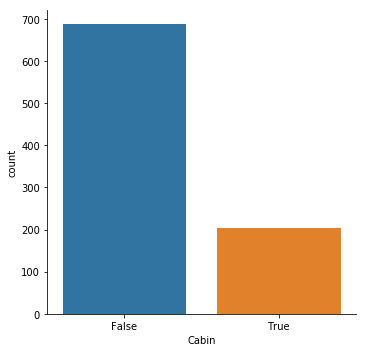

In [177]:
sb.factorplot(x='Cabin', kind='count', data=d);

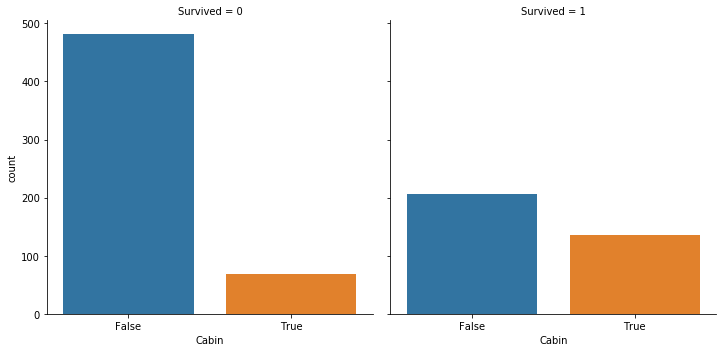

In [205]:
d=train.copy()
d.Cabin=d.Cabin.astype(str)!='nan'
sb.factorplot(x='Cabin',col='Survived', kind='count', data=d);

In [206]:
d=d.groupby(['Cabin','Survived']).PassengerId.agg(['count'])


In [207]:
d

count
Cabin Survived       
False 0           481
      1           206
True  0            68
      1           136

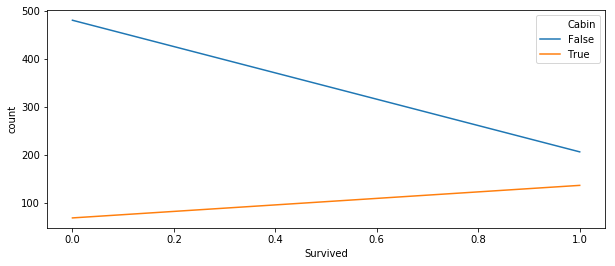

In [208]:
sb.lineplot(x="Survived", y="count",hue="Cabin", markers=True, data=d.reset_index())

### Gender vise

In [209]:
d=train.copy()
d.Cabin=d.Cabin.astype(str)!='nan'
d=d.groupby(['Cabin','Survived','Sex']).PassengerId.agg(['count'])
d.T

Cabin     False                   True                  
Survived      0           1           0           1     
Sex      female male female male female male female male
count        75  406    142   64      6   62     91   45

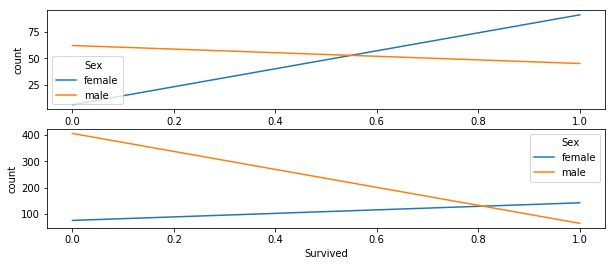

In [210]:
d=d.reset_index()
fig, ax = plt.subplots(2,1)
sb.lineplot(x="Survived", y="count",hue="Sex", markers=True, data=d[d.Cabin==True],ax=ax[0])
sb.lineplot(x="Survived", y="count",hue="Sex", markers=True, data=d[d.Cabin==False],ax=ax[1])

### Embarking port

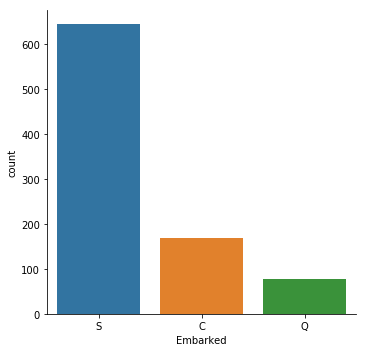

In [218]:
d=train.copy()
sb.factorplot(x='Embarked',kind='count',data=d)

### their survival rates

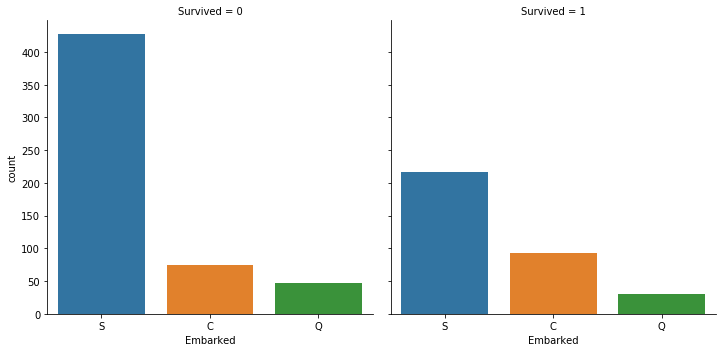

In [219]:
sb.factorplot(x='Embarked',col='Survived',kind='count',data=d)

In [223]:
d=d.groupby(['Survived','Embarked']).PassengerId.agg(['count'])
d.T

Survived   0            1         
Embarked   C   Q    S   C   Q    S
count     75  47  427  93  30  217

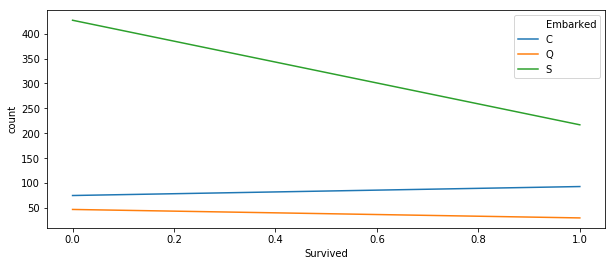

In [226]:
sb.lineplot(x="Survived",y='count',hue='Embarked', markers=True, data=d.reset_index())

In [234]:
d=train.copy()
d=d.groupby(['Embarked','Survived','Sex']).PassengerId.agg(['count'])
d.T

Embarked      C                       Q                       S              \
Survived      0           1           0           1           0           1   
Sex      female male female male female male female male female male female   
count         9   66     64   29      9   38     27    3     63  364    140   

Embarked       
Survived       
Sex      male  
count      77

In [235]:
d=d.reset_index()


Text(0.5,1,'female')

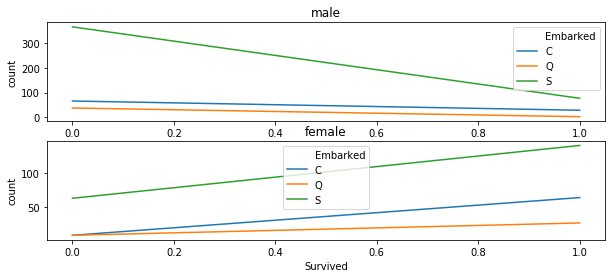

In [240]:
fig, ax = plt.subplots(2,1)
sb.lineplot(x="Survived", y="count",hue="Embarked", markers=True, data=d[d.Sex=='male'],ax=ax[0]).set_title("male")
sb.lineplot(x="Survived", y="count",hue="Embarked", markers=True, data=d[d.Sex=='female'],ax=ax[1]).set_title("female")


In [241]:
from sklearn.linear_model import LogisticRegression

In [242]:
logreg_clf = LogisticRegression()